**Mount a temporary folder on Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Displaying the image**

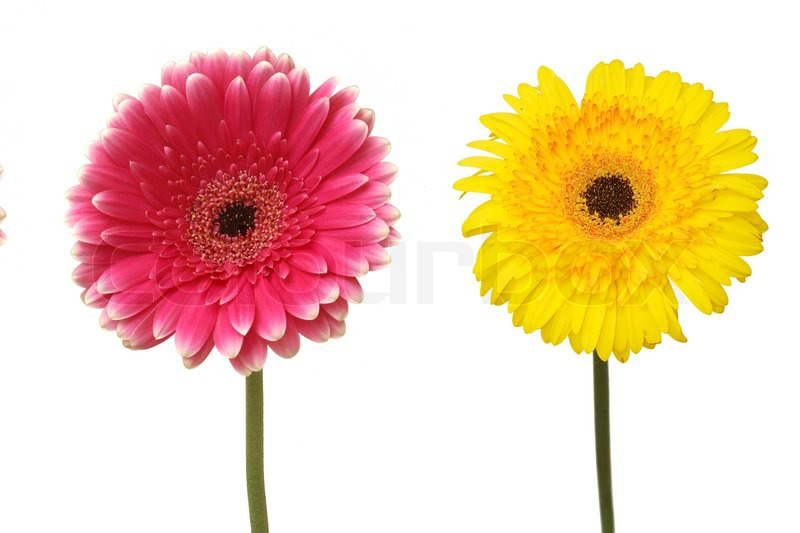

In [5]:
# Importing Image class from PIL module 
from PIL import Image 

im = Image.open(r"/content/gdrive/MyDrive/Image1.jpg")

im

**Determine the crop of an image**

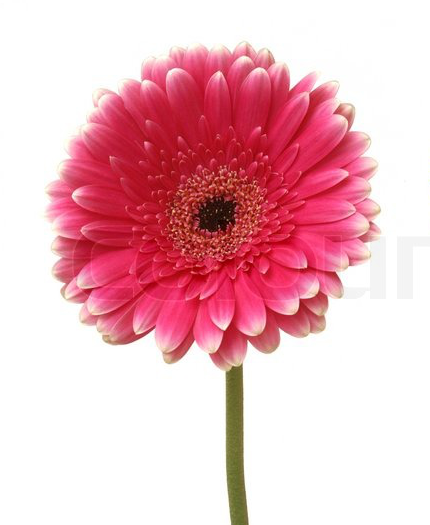

In [35]:
# Importing Image class from PIL module 
from PIL import Image 

width, height = im.size

left = 20
top = 5
right = 450
bottom = 530

im1 = im.crop((left, top, right, bottom)) 
  
# Shows the image in image viewer 
im1

**Save Image into the mounted folder**

In [37]:
im1.save("/content/gdrive/MyDrive/Image1Cropped.jpg")

**Show cropped image**

Original:


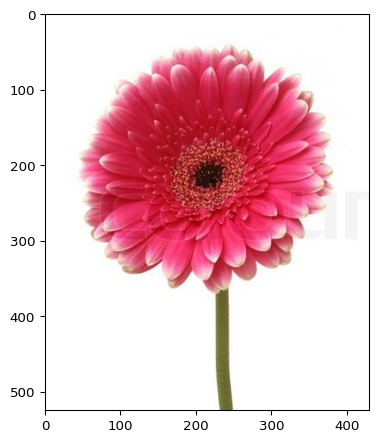

In [38]:
# Importing Image reader from iamgeio module 
import imageio
# Augmentation library 
import imgaug as ia
# Magic command to plot static image in the notebook
%matplotlib inline

imagesInput = [
               imageio.imread("/content/gdrive/MyDrive/Image1Cropped.jpg")#,
               #imageio.imread("/content/gdrive/MyDrive/Image2Cropped.jpg")
]

print("Original:")
for i in range(len(imagesInput)):
  ia.imshow(imagesInput[i])

Augmented:


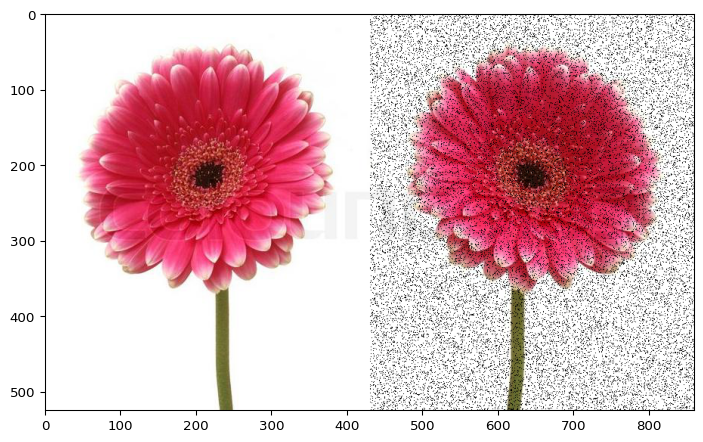

In [42]:
# Importing augmenters
import imgaug.augmenters as iaa
# Importing Numpy
import numpy as np

# Applying a sequence of augmenters
seq = iaa.Sequential([
    #iaa.GaussianBlur(sigma=(2.0, 6.0)),
    #iaa.AdditiveGaussianNoise(scale=(50, 60)),
    #iaa.Crop(percent=(0, 0.2), keep_size=True),
    #iaa.ElasticTransformation(alpha=(2.0, 6.0), sigma=0.25),
    iaa.Dropout(p=(0, 0.15)),
    iaa.Fliplr(1)
], random_order=True)

images_aug = seq(images=imagesInput)

print("Augmented:")
for i in range(len(imagesInput)):
  # Using Numpy to display an image beside other
  ia.imshow(np.hstack([imagesInput[i], images_aug[i]]))

In [44]:
from google.colab import files

# Saving image into Google Drive folder
for i in range(len(imagesInput)):
  imageio.imwrite('/content/gdrive/MyDrive/Image{}Cropped.jpg'.format(i), images_aug[i])


In [45]:
# Download image from Google Drive folder
for i in range(len(imagesInput)):
  files.download('/content/gdrive/MyDrive/Image{}Cropped.jpg'.format(i))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>